In [1]:
import math
import sys

import numpy as np
import matplotlib.pyplot as plt

# Python en el ámbito científico

A lo largo de los años Python a acrecentado sus capacidades en varios ámbitos, 
uno de ellos es el científico.
El proyecto [SciPy](https://www.scipy.org/) originalmente era una colección de
paquetes para matemáticas, ciencia e ingeniería que consistía en:

- [NumPy](http://www.numpy.org/): Un paquete para la manipulación de arreglos y
  matrices numéricas.
- [Matplotlib](https://matplotlib.org/): Una biblioteca para la visualización de
  datos en 2D.
- [SciPy](https://www.scipy.org/): Un paquete de análisis numérico con rutinas
  para optimización, álgebra lineal, integración, interpolación, funciones
  especiales, y más.
- [SymPy](https://www.sympy.org/): Una biblioteca de álgebra simbólica para la
  resolución exacta de ecuaciones en cálculo diferencial e integral, álgebra
  lineal, y más.
- [Pandas](https://pandas.pydata.org/): Una biblioteca para el análisis de datos
  tabulares (tablas).
- [IPython](https://ipython.org/): Un entorno de trabajo interactivo para
  computación científica.
  Actualmente [Jupyter](https://jupyter.org/) es el proyecto que ha tomado el
  relevo de IPython.

Para este curso nos enfocaremos en los paquetes de NumPy y Matplotlib, luego
en otras secciones veremos bibliotecas centradas en el procesamiento digital
de imágenes y en el aprendizaje automático, concretaente en los paquetes de
[scikit image](https://scikit-image.org/), [OpenCV](https://opencv.org/),
[scikit-learn](https://scikit-learn.org/stable/), y [Keras](https://keras.io/).

Si eres un purista de Python, es posible que te preguntes por qué no usamos
las bibliotecas estándar de Python para el procesamiento de datos, como
`math`, `random`, `itertools`, `functools`, y demás.
La respuesta es que estas bibliotecas están diseñadas para ser generales y
flexibles, y no están optimizadas para el procesamiento de datos numéricos.
No te sientas agobiado por la cantidad de bibliotecas que necesitas aprender,
ya que estas bibliotecas están diseñadas para ser fáciles de usar y tienen el
respaldo de una gran comunidad de usuarios y desarrolladores.

## 1. Agarrándole el hilo a Jupyter
<!-- Me rehúso a poner "Introducción a Jupyter" -->

Cuando uno trata de hacer algún tipo de análisis de datos, es común comenzar a
experimentar con instrucciones pequeñas y ver los resultados de inmediato antes
de pasar a un entorno de desarrollo más robusto.
Más aún, es común querer compartir estos resultados con otras personas.
Para estos casos, Jupyter es una herramienta muy útil.

- Jupyter combina celdas de texto (en lenguaje 
  [Markdown](https://youtu.be/X5mkZXmaKp4)) con celdas de código en algún
  lenguaje de programación como **Ju**lia, **Pyt**hon, o **R**.
- Las celdas de código se pueden ejecutar de manera independiente y puedes
  ver los resultados de inmediato.
- Las celdas de texto se pueden usar para explicar el código, los resultados, o
  cualquier otro aspecto del análisis.
- Las celdas de código admiten *comandos mágicos* que permiten realizar tareas
  específicas, como medir el tiempo de ejecución de una celda o solicitar ayuda
  sobre un objeto.

Nosotros usaremos Jupyter para presentar ejemplos de Python en el ámbito
del procesamiento digital de imágenes, que es el tema de este curso.

### 1.1 Obteniendo ayuda

En Python puedes solicitar ayuda sobre un objeto usando la función `help`.

In [2]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [3]:
max([1,4,782,23,15])

782

In [4]:
max(1, 4)

4

Jupyter además utiliza el signo de interrogación `?` para solicitar ayuda sobre
un objeto.
Dado que esto no es sintaxis estándar de Python, es posible que observes errores
de sintaxis en un entorno de desarrollo estándar como Visual Studio Code.

In [5]:
?max

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

Esta notación también funciona con métodos

In [6]:
canasta = ["huevos", "leche", "pan", "jamón", "manzanas"]
canasta.count?

Signature: canasta.count(value, /)
Docstring: Return number of occurrences of value.
Type:      builtin_function_or_method

... e incluso con los objetos mismos

In [7]:
canasta?

Type:        list
String form: ['huevos', 'leche', 'pan', 'jamón', 'manzanas']
Length:      5
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

Hay ocasiones en las que la documentación de una función es suficiente ambigua
como para que merite una consulta más detallada.
En estos casos, el doble signo de interrogación `??` te mostrará el código
fuente del objeto en cuestión.

In [8]:
# Creamos una función en Python con una documentación ambigua
def lel(datos):
    """Aplica la transformación a los datos"""  # Casos de la vida real :(
    datos = datos**2 + 1
    return datos

In [9]:
?lel

Signature: lel(datos)
Docstring: Aplica la transformación a los datos
File:      /tmp/ipykernel_18092/734126753.py
Type:      function

In [10]:
??lel

Signature: lel(datos)
Source:   
def lel(datos):
    """Aplica la transformación a los datos"""  # Casos de la vida real :(
    datos = datos**2 + 1
    return datos
File:      /tmp/ipykernel_18092/734126753.py
Type:      function

### 1.2 Autocompletado

No importa si usas Jupyter o un entorno de desarrollo estándar, el
autocompletado es una herramienta muy útil para explorar las capacidades de
un objeto.

- En Jupyter, puedes presionar la tecla `TAB`
- En Visual Studio Code, puedes presionar `CTRL` + `ESPACIO`

Prueba esto: escribe `canasta.` en una celda de código y presiona `TAB` (si usas
Jupyter) o `CTRL` + `ESPACIO` (si usas Visual Studio Code) para ver una lista de
los métodos y atributos del objeto `canasta`.

Si más o menos recuerdas el nombre de un método o atributo, pero no estás seguro
de la ortografía, puedes solicitar a Juptyer que busque todas las coincidencias
posibles mediante el comodín `*`.

In [11]:
# Listar los métodos de la canasta que inician con "re"
canasta.re*?

canasta.remove
canasta.reverse

In [12]:
# Listar los métodos de la canasta que terminan con "nd"
canasta.*nd?

canasta.append
canasta.extend

### 1.2 Los métodos mágicos

Jupyter admite *comandos mágicos* que permiten realizar tareas específicas como
medir el tiempo de ejecución de una celda o ejecutar un comando externo.

In [13]:
# Cómo crear una lista de números al cuadrado más uno
def lol(datos):
    resultado = []
    for i in datos:
        resultado.append(i**2 + 1)
    return resultado

El comando mágico `%%timeit` mide el tiempo de ejecución de una celda de código
de manera estadística.
El resultado es una estimación del tiempo que tarda en ejecutarse la celda en
la forma $\mu \pm \sigma$ donde $\mu$ es el tiempo promedio y $\sigma$ es la
desviación estándar.

In [14]:
%%timeit
resultado = lol([1,2,3,4,5])

619 ns ± 68.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [15]:
datos = [1,2,3,4,5]

In [16]:
%%timeit
resultado = [i**2 + 1 for i in datos]

615 ns ± 52.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


El comando mágico `%lsmagic` muestra una lista de todos los comandos mágicos
disponibles.

In [17]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %mamba  %man  %matplotlib  %micromamba  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %

Una de las extensiones más útiles de Jupyter sirve para medir el tiempo de
ejecución de cada línea de código.

In [18]:
%load_ext line_profiler

In [19]:
def fib(n):
    if n <= 1:
        return n
    return fib(n - 1) + fib(n - 2)

%lprun -f fib fib(32)

Timer unit: 1e-09 s

Total time: 4.2147 s
File: /tmp/ipykernel_18092/384297603.py
Function: fib at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def fib(n):
     2   7049155 1940694192.0    275.3     46.0      if n <= 1:
     3   3524578  756635603.0    214.7     18.0          return n
     4   3524577 1517369144.0    430.5     36.0      return fib(n - 1) + fib(n - 2)

### 1.3 Consultar resultados anteriores

In [20]:
2761834761897461982376**128

2973750451001437028415783677997092938261392088530064309323439701340654363511525586783556557404021873858657800931462383500070893201373284078371093032920902669225561423695021035480457802892660109530219475094939843838037897176442936892684437518478579721247635681959178127682939648026969921461417912505156451032384694151671166649301619318888218920163572175095043538412989971708081765807067969289270090238349751818383389005116623484847769707291267819640032423068323617959177908196568261396753393245684798676712162031954329693109419444891637542024974025404719960319300774083503486015989061038548053478885349513711449443919050689732814887838631092239271728497850369391653081604333101082235420061492245439776919228290653349224641036819504000869192397109122422470235621953874138047699999634293714687276118777563356297731570001831770001174933759592334807777524431488997887103301496304985550485671945249206923151851144943555816408245356595644989464296008819992250050847994888452191885123426395698572826458077730

In [21]:
_//2

1486875225500718514207891838998546469130696044265032154661719850670327181755762793391778278702010936929328900465731191750035446600686642039185546516460451334612780711847510517740228901446330054765109737547469921919018948588221468446342218759239289860623817840979589063841469824013484960730708956252578225516192347075835583324650809659444109460081786087547521769206494985854040882903533984644635045119174875909191694502558311742423884853645633909820016211534161808979588954098284130698376696622842399338356081015977164846554709722445818771012487012702359980159650387041751743007994530519274026739442674756855724721959525344866407443919315546119635864248925184695826540802166550541117710030746122719888459614145326674612320518409752000434596198554561211235117810976937069023849999817146857343638059388781678148865785000915885000587466879796167403888762215744498943551650748152492775242835972624603461575925572471777908204122678297822494732148004409996125025423997444226095942561713197849286413229038865

In [22]:
In[19]

"def fib(n):\n    if n <= 1:\n        return n\n    return fib(n - 1) + fib(n - 2)\n\nget_ipython().run_line_magic('lprun', '-f fib fib(32)')"

In [23]:
Out[20]

2973750451001437028415783677997092938261392088530064309323439701340654363511525586783556557404021873858657800931462383500070893201373284078371093032920902669225561423695021035480457802892660109530219475094939843838037897176442936892684437518478579721247635681959178127682939648026969921461417912505156451032384694151671166649301619318888218920163572175095043538412989971708081765807067969289270090238349751818383389005116623484847769707291267819640032423068323617959177908196568261396753393245684798676712162031954329693109419444891637542024974025404719960319300774083503486015989061038548053478885349513711449443919050689732814887838631092239271728497850369391653081604333101082235420061492245439776919228290653349224641036819504000869192397109122422470235621953874138047699999634293714687276118777563356297731570001831770001174933759592334807777524431488997887103301496304985550485671945249206923151851144943555816408245356595644989464296008819992250050847994888452191885123426395698572826458077730

## 2. Manipulación de datos con NumPy

**Numpy** es la biblioteca estándar *de facto* para el procesamiento de datos
numéricos en Python.
Para ver por qué necesitamos NumPy en nuestras vidas, considera el siguiente
ejemplo.

### 2.1 Repaso de listas de Python

In [24]:
# Creando una lista de Python:
arr = [1,2,3,4,5]

Para acceder a cada elemento de una lista usamos el operador de indexación `[]`.
Por ejemplo, para acceder al primer elemento de la lista `a` usamos `a[0]`, para
acceder al segundo elemento usamos `a[1]`, y así sucesivamente.

> **Recordatorio:** Los lenguajes de programación suelen comenzar a contar desde
> cero debido a las [carreras de yates][cero], no por razones matemáticas o
> técnicas.
>
> [cero]: https://exple.tive.org/blarg/2013/10/22/citation-needed/

In [25]:
suerte = [7, 13, 23, 42]  # Números de la suerte
suerte[2]

23

In [26]:
suerte[-1]  # Último elemento

42

Python admite una *notación de rebanadas* para acceder a una sublista de una
lista.
Esta tiene la forma `a[i:j]` y devuelve una lista que contiene los elementos
de `a` desde el índice `i` hasta el índice `j-1`. ¿Confuso? Piensa en las
rebanadas como los cortes que existen entre los elementos de la lista.
Por ejemplo, la palabra "Rebanadas" tiene 10 cortes entre sus letras:

```
 +---+---+---+---+---+---+---+---+---+
 | R | e | b | a | n | a | d | a | s |
 +---+---+---+---+---+---+---+---+---+
 0   1   2   3   4   5   6   7   8   9
-9  -8  -7  -6  -5  -4  -3  -2  -1    
```

In [27]:
# Probando rebanadas
suerte[1:3]  # De la rebanada 1 a la 3

[13, 23]

In [28]:
suerte[1:]  # De la rebanada 1 en adelante

[13, 23, 42]

In [29]:
suerte[:3]  # Hasta la rebanada 3

[7, 13, 23]

In [30]:
suerte[:]  # Toda la lista

[7, 13, 23, 42]

Si además colocamos un segundo `:` después de `j`, podemos especificar un
*salto* entre los elementos de la lista.

In [31]:
suerte[::2]  # La lista de dos en dos

[7, 23]

In [32]:
suerte[::-1]  # La lista al revés

[42, 23, 13, 7]

In [33]:
suerte[1::2]  # La lista de dos en dos, empezando en el elemento 1

[13, 42]

Las listas de Python se guardan como arreglos de punteros a objetos; a su vez,
cada objeto es un puntero a una dirección de memoria que contiene el tipo de
dato, el valor del objeto, e información adicional como el número de referencias
al objeto (cuando este valor es cero, el objeto es eliminado de la memoria por
el *recolector de basura* de Python).
Puedes leer más sobre esto en [este tutorial][pyobject] de Real Python.

[pyobject]: https://realpython.com/pointers-in-python/

In [34]:
sys.getsizeof?

Docstring:
getsizeof(object [, default]) -> int

Return the size of object in bytes.
Type:      builtin_function_or_method

In [35]:
# Verificando el tamaño de la lista:
tam = sys.getsizeof(arr) # El tamaño de la lista
tam += sum(sys.getsizeof(x) for x in arr)  # El tamaño de los elementos
print(f"La lista {arr} ocupa {tam} bytes en memoria")

La lista [1, 2, 3, 4, 5] ocupa 244 bytes en memoria


Para simular una matriz (de dos dimensiones) en Python, podemos usar una lista
de listas.
Cada lista interna representa un renglón de la matriz.

In [36]:
arr = [[1,2,3], [4,5,6], [7,8,9]]
print(arr)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [37]:
for renglon in arr:
    print(renglon)

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


In [38]:
arr[1]  # Segundo renglón

[4, 5, 6]

In [39]:
arr[1][0]  # Renglón 1, columna 0

4

In [40]:
arr[1][0] += 0.1  # Modificando el valor del renglón 1, columna 0

print(arr)

[[1, 2, 3], [4.1, 5, 6], [7, 8, 9]]


In [41]:
# Sumar 0.1 a cada elemento de la matriz:
for divisores in range(3):
    for j in range(3):
        arr[divisores][j] += 0.1
print(arr)

[[1.1, 2.1, 3.1], [4.199999999999999, 5.1, 6.1], [7.1, 8.1, 9.1]]


In [42]:
arr = [[1, 2, 3], [4.1, 5, 6], [7, 8, 9]]
# Obtener la columna 1 de la matriz:
col = [ren[1] for ren in arr]
print(col)

[2, 5, 8]


In [43]:
# Crear una matriz de ceros
A = [[0] * 3 for i in range(3)]
print(A)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [44]:
A[1][1] = 1
print(A)

[[0, 0, 0], [0, 1, 0], [0, 0, 0]]


In [45]:
# Elevar la matriz al cuadrado:
A = [[1,2,3], [4,5,6], [7,8,9]]

resultado = [[0]*3 for i in range(3)]
for divisores in range(3):
    for j in range(3):
        resultado[divisores][j] = sum(A[divisores][k]* A[k][j] for k in range(3))

print(resultado)

[[30, 36, 42], [66, 81, 96], [102, 126, 150]]


In [46]:
# Estimando el tamaño de la matriz en bytes:
tam = sys.getsizeof(A)  # El tamaño de la lista más externa
tam += sum(sys.getsizeof(reng) for reng in A)  # El tamaño de los renglones
tam += sum(sys.getsizeof(x) for reng in A for x in reng)  # El tamaño de los elementos
print(tam)

596


Ahorrando memoria con el módulo `array` de la biblioteca estándar de Python.

In [47]:
# Usando el módulo `array` de Python:
from array import array

In [48]:
?array

Init signature: array(self, /, *args, **kwargs)
Docstring:     
array(typecode [, initializer]) -> array

Return a new array whose items are restricted by typecode, and
initialized from the optional initializer value, which must be a list,
string or iterable over elements of the appropriate type.

Arrays represent basic values and behave very much like lists, except
the type of objects stored in them is constrained. The type is specified
at object creation time by using a type code, which is a single character.
The following type codes are defined:

    Type code   C Type             Minimum size in bytes
    'b'         signed integer     1
    'B'         unsigned integer   1
    'u'         Unicode character  2 (see note)
    'h'         signed integer     2
    'H'         unsigned integer   2
    'i'         signed integer     2
    'I'         unsigned integer   2
    'l'         signed integer     4
    'L'         unsigned integer   4
    'q'         signed integer     8 (see n

In [49]:
# Ejemplo de arreglo de enteros de un byte
arr = array('b', [1,2,3,4,5, 127, -128])
arr

array('b', [1, 2, 3, 4, 5, 127, -128])

In [50]:
# Los bytes tienen un rango de -128 a 127
try:
    arr.append(128)  # Fuera de rango
except OverflowError as err:
    print(f"Error: {err}")

Error: signed char is greater than maximum


In [51]:
# Ejemplo de arreglo de flotantes
arr = array("f", [0.5, 1 / 7, 0.5 * 5.0**0.5 - 0.5])
arr

array('f', [0.5, 0.1428571492433548, 0.6180340051651001])

In [52]:
# Los flotantes incluyen constantes especiales como `nan` e `inf`
arr.extend([math.e, math.pi, math.nan, math.inf])
arr

array('f', [0.5, 0.1428571492433548, 0.6180340051651001, 2.7182817459106445, 3.1415927410125732, nan, inf])

In [53]:
# Cualquier otro tipo de dato se intentará convertir a flotante
arr[0] = True
arr[1] = 42
arr

array('f', [1.0, 42.0, 0.6180340051651001, 2.7182817459106445, 3.1415927410125732, nan, inf])

Los array de Python son 1D, por lo que no podemos usarlos para representar
matrices de dos dimensiones de manera directa.
En su lugar, podemos usar una lista de arrays de Python, donde cada array
representa un renglón de la matriz.

In [54]:
# Sumar 0.1 a cada entrada (otra vez)
arr = [array("f", [1, 2, 3]), array("f", [4, 5, 6]), array("f", [7, 8, 9])]
for divisores in range(3):
    for j in range(3):
        arr[divisores][j] += 0.1
# Dado que estamos usando flotantes de precisión simple, el resultado no
# es exacto debido a errores de redondeo en la representación binaria.
print(arr)

[array('f', [1.100000023841858, 2.0999999046325684, 3.0999999046325684]), array('f', [4.099999904632568, 5.099999904632568, 6.099999904632568]), array('f', [7.099999904632568, 8.100000381469727, 9.100000381469727])]


In [55]:
# Podemos apreciar que el tamaño de un arreglo de bytes es mucho menor:
sys.getsizeof(array('b', [1,2,3,4,5, 127, -128]))

87

In [56]:
arr = [array("b", [1, 2, 3]), array("b", [4, 5, 6]), array("b", [7, 8, 9])]
tam = sys.getsizeof(arr)
tam += sum(sys.getsizeof(ren) for ren in arr)
print(tam)

329


### 2.2 Creación de arreglos de NumPy

In [57]:
import numpy as np  # Usamos "np" por convención

In [58]:
# Conversión de listas a arreglos:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [59]:
# El tipo de dato del arreglo se infiere automáticamente:
arr.dtype

dtype('int64')

In [60]:
# El tamaño del arreglo es mucho menor:
arr.nbytes

72

In [61]:
# Creación de arreglos en ceros:
np.zeros(10)  # Un vector de 10 ceros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
np.zeros(10, dtype=np.int16)  # Un vector de 10 ceros enteros de 16 bits

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [63]:
np.zeros((5, 5), dtype=np.int_)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [64]:
# Uso de linspace para crear un arreglo con elementos equiespaciados:
np.linspace(0, 10, num=11)  # 11 números de 0 a 10

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [65]:
# Creación de arreglos aleatorios:
np.random.random((5, 5))  # Arreglo de 5x5 con números aleatorios entre 0 y 1

array([[0.6865995 , 0.65037192, 0.11266948, 0.95463219, 0.66161701],
       [0.66232435, 0.14932956, 0.92375086, 0.61319932, 0.88173883],
       [0.17964647, 0.31872257, 0.11507158, 0.04476491, 0.16061379],
       [0.88307935, 0.08667292, 0.29298013, 0.00740072, 0.48590321],
       [0.05797283, 0.33871742, 0.13294903, 0.13862041, 0.28694189]])

In [66]:
np.random.normal(size=10)  # 10 números aleatorios con distribución normal

array([ 1.65322867,  0.37912013,  0.86292447, -0.32679158,  0.32946471,
       -0.825083  , -0.81906456,  1.35124596, -0.17241881,  0.36767491])

### 2.3 Acceso a elementos

Veamos la manera en que podemos acceder a los elementos de un arreglo.

In [67]:
# Elementos individuales de un arreglo:
arr[2, 1]

8

In [68]:
# Acceso a rebanadas de un arreglo 1D:
arr1d = np.array([1,2,3,4,5])
arr1d[::2]

array([1, 3, 5])

In [69]:
# Acceso a rebanadas de un arreglo 2D:
arr2d = np.array(
    [[1,2,3], 
     [4,5,6],
     [7,8,9]]
)

arr2d[1]

array([4, 5, 6])

In [70]:
arr2d[1:]

array([[4, 5, 6],
       [7, 8, 9]])

In [71]:
arr2d[::-1]  # Invertir el orden de los renglones

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

In [72]:
arr2d[::-1, ::-1]  # Invertir el orden de los renglones y columnas

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [73]:
arr2d[1, 1:]

array([5, 6])

In [74]:
arr2d[1:, 1:]

array([[5, 6],
       [8, 9]])

Una cuestión muy importante en la obtención de rebanadas de un arreglo es que
estas no son copias, sino vistas del arreglo original.
Esto significa que si modificas una rebanada, también modificarás el arreglo
original.

In [75]:
# Primero veamos lo que pasa con las rebanadas de listas:
arr = [1,2,3,4,5,6]
resultado = arr[2:]
resultado[1] = 0
print(f"{resultado=}")
print(f"{arr=}")

resultado=[3, 0, 5, 6]
arr=[1, 2, 3, 4, 5, 6]


In [76]:
# Lo mismo, pero con arreglos de NumPy:
arr = np.array([1,2,3,4,5,6])
resultado = arr[2:]
resultado[1] = 0
print(f"{resultado=}")
print(f"{arr=}")

resultado=array([3, 0, 5, 6])
arr=array([1, 2, 3, 0, 5, 6])


### 2.4 Operaciones con arreglos

Las operaciones con arreglos en NumPy son *vectorizadas*, lo que significa que
las operaciones se aplican a cada elemento del arreglo.

In [77]:
# Aritmética de arreglos
arr = np.array([1,2,3,4,5])
arr + 1

array([2, 3, 4, 5, 6])

In [78]:
arr1 = np.array([1,2,3,4])
arr2 = np.array([4,3,2,1])
arr1 + arr2

array([5, 5, 5, 5])

En particular, el uso de `linspace` combinado con las operaciones vectorizadas
de NumPy es muy útil para la tabulación de funciones, que es una tarea común
en visualización de datos así como en el procesamiento digital de imágenes.

In [79]:
# Tabulación de polinomios:
x = np.linspace(-10, 10)
y = x**2 + 2*x + 1
y

array([8.10000000e+01, 7.38196585e+01, 6.69725115e+01, 6.04585589e+01,
       5.42778009e+01, 4.84302374e+01, 4.29158684e+01, 3.77346939e+01,
       3.28867139e+01, 2.83719284e+01, 2.41903374e+01, 2.03419409e+01,
       1.68267389e+01, 1.36447314e+01, 1.07959184e+01, 8.28029988e+00,
       6.09787589e+00, 4.24864640e+00, 2.73261141e+00, 1.54977093e+00,
       7.00124948e-01, 1.83673469e-01, 4.16493128e-04, 1.50354019e-01,
       6.33486047e-01, 1.44981258e+00, 2.59933361e+00, 4.08204915e+00,
       5.89795918e+00, 8.04706372e+00, 1.05293628e+01, 1.33448563e+01,
       1.64935444e+01, 1.99754269e+01, 2.37905040e+01, 2.79387755e+01,
       3.24202416e+01, 3.72349021e+01, 4.23827572e+01, 4.78638067e+01,
       5.36780508e+01, 5.98254894e+01, 6.63061224e+01, 7.31199500e+01,
       8.02669721e+01, 8.77471887e+01, 9.55605998e+01, 1.03707205e+02,
       1.12187005e+02, 1.21000000e+02])

Numpy usa el concepto de *función universal* (**ufunc**) para aplicar
operaciones a cada elemento de un arreglo.
Las operaciones aritméticas son ejemplos de *ufuncs*, pero también están
presentes funciones comunes como `np.abs`, `np.sin`, `np.cos`, `np.exp`,
`np.log` y muchas más.


In [80]:
# Tabulación de funciones elementales:
x = np.linspace(-2*np.pi, 2*np.pi)
y = np.sin(x) + np.cos(x)**2
y

array([ 1.        ,  1.18931394,  1.24991384,  1.21170834,  1.12387362,
        1.0396238 ,  1.00051352,  1.02444348,  1.10054098,  1.19226648,
        1.24792657,  1.21581503,  1.05996523,  0.77229975,  0.37786116,
       -0.06842845, -0.49285478, -0.8191914 , -0.98615869, -0.96170966,
       -0.75056307, -0.39309195,  0.04415326,  0.48390767,  0.85577027,
        1.11152459,  1.23444168,  1.24037432,  1.17057102,  1.07826218,
        1.01265391,  1.00459953,  1.05774544,  1.14748973,  1.22802834,
        1.24562864,  1.15461701,  0.93182479,  0.58559859,  0.15685677,
       -0.28828951, -0.67265764, -0.92541235, -0.99845891, -0.87771191,
       -0.58641191, -0.17965676,  0.26847873,  0.68200477,  1.        ])

In [81]:
# La función logística (también llamada `expit`) manda valores reales
# (-inf, inf) a (0, 1); es útil para modelar probabilidades:
x = np.linspace(-2*np.pi, 2*np.pi)
y = 1/(1 + np.exp(-x))
y

array([0.00186396, 0.00240757, 0.00310921, 0.00401452, 0.00518205,
       0.00668685, 0.00862484, 0.01111822, 0.014322  , 0.01843176,
       0.02369248, 0.03040819, 0.03895153, 0.04977196, 0.06339992,
       0.08044344, 0.10157182, 0.12748022, 0.1588289 , 0.19615347,
       0.2397493 , 0.28954438, 0.34498858, 0.40499748, 0.46798678,
       0.53201322, 0.59500252, 0.65501142, 0.71045562, 0.7602507 ,
       0.80384653, 0.8411711 , 0.87251978, 0.89842818, 0.91955656,
       0.93660008, 0.95022804, 0.96104847, 0.96959181, 0.97630752,
       0.98156824, 0.985678  , 0.98888178, 0.99137516, 0.99331315,
       0.99481795, 0.99598548, 0.99689079, 0.99759243, 0.99813604])

In [82]:
# La función inversa a expit es la función logit, que manda valores
# (0, 1) a (-inf, inf):
x = np.linspace(0, 1)
y = np.log(x/(1 - x))
y

/tmp/ipykernel_18092/3779991517.py:4: RuntimeWarning: divide by zero encountered in divide
  y = np.log(x/(1 - x))
/tmp/ipykernel_18092/3779991517.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x/(1 - x))


array([       -inf, -3.87120101, -3.15700042, -2.73002911, -2.42036813,
       -2.17475172, -1.96944065, -1.79175947, -1.63413053, -1.49165488,
       -1.36097655, -1.23969089, -1.12601126, -1.01856958, -0.91629073,
       -0.81831032, -0.72391884, -0.63252256, -0.54361545, -0.4567584 ,
       -0.37156356, -0.28768207, -0.20479441, -0.12260232, -0.04082199,
        0.04082199,  0.12260232,  0.20479441,  0.28768207,  0.37156356,
        0.4567584 ,  0.54361545,  0.63252256,  0.72391884,  0.81831032,
        0.91629073,  1.01856958,  1.12601126,  1.23969089,  1.36097655,
        1.49165488,  1.63413053,  1.79175947,  1.96944065,  2.17475172,
        2.42036813,  2.73002911,  3.15700042,  3.87120101,         inf])

Algunas funciones son de *agregación*, lo que significa que reducen un arreglo
a un solo valor.
Estas funciones incluyen `np.sum`, `np.prod`, `np.mean`, `np.std`, `np.var`,
`np.min`, `np.max`, `np.median`,  `np.percentile`, `np.any` y `np.all`.

In [83]:
rng = np.random.default_rng(42)
arr = rng.random(1000)  # Mil números aleatorios entre 0 y 1
np.sum(arr)  # Suma de todos los elementos

497.17783852843195

La manera más simple de representar una distribución de datos es mediante la
expresión $\mu \pm \sigma$, donde $\mu$ es la media y $\sigma$ es la desviación
estándar, usualmente redondeada a dos o tres decimales.

In [84]:
print(f"{np.mean(arr):.3} ± {np.std(arr):.3}")

0.497 ± 0.291


In [85]:
# Otra forma común es mediante los 5 números resumen:
print(f"{np.max(arr)=}")
print(f"{np.quantile(arr, 0.25)=}")
print(f"{np.median(arr)=}")
print(f"{np.quantile(arr, 0.75)=}")
print(f"{np.min(arr)=}")

np.max(arr)=0.9991047304742386
np.quantile(arr, 0.25)=0.2402592486877074
np.median(arr)=0.4948241015730209
np.quantile(arr, 0.75)=0.7588933903124163
np.min(arr)=0.001233062511908134


### 2.5 Selección de elementos y operadores booleanos

In [86]:
arr = np.arange(50)  # Un arreglo de 50 elementos: 0, 1, 2, ..., 49
mask = arr > 25  # ¿Cuáles elementos son mayores a 25?
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [87]:
arr[mask]  # Los elementos que son mayores a 25

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49])

In [88]:
np.frompyfunc?

Docstring:
frompyfunc(func, /, nin, nout, *[, identity])

Takes an arbitrary Python function and returns a NumPy ufunc.

Can be used, for example, to add broadcasting to a built-in Python
function (see Examples section).

Parameters
----------
func : Python function object
    An arbitrary Python function.
nin : int
    The number of input arguments.
nout : int
    The number of objects returned by `func`.
identity : object, optional
    The value to use for the `~numpy.ufunc.identity` attribute of the resulting
    object. If specified, this is equivalent to setting the underlying
    C ``identity`` field to ``PyUFunc_IdentityValue``.
    If omitted, the identity is set to ``PyUFunc_None``. Note that this is
    _not_ equivalent to setting the identity to ``None``, which implies the
    operation is reorderable.

Returns
-------
out : ufunc
    Returns a NumPy universal function (``ufunc``) object.

See Also
--------
vectorize : Evaluates pyfunc over input arrays using broadcasting ru

In [89]:
def es_primo(n: int) -> bool:
    if n < 2:
        return False
    divisores = np.arange(2, math.isqrt(n) + 1)
    return not np.any(n % divisores == 0)

# Hagamos que la función `es_primo` funcione con arreglos de NumPy:
es_primo_ufunc = np.frompyfunc(es_primo, 1, 1, identity=None)
mask = es_primo_ufunc(arr).astype(bool)  # ¿Cuáles elementos son primos?
mask

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False, False])

In [90]:
arr[mask]  # Los elementos que son primos

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47])

## 3. Visualización de datos con Matplotlib


### 3.1 Gráficos de línea

*Matplotlib* es una biblioteca para la visualización de datos y está diseñada
a imagen y semejanza de la visualización de datos en MATLAB (de ahí el nombre).

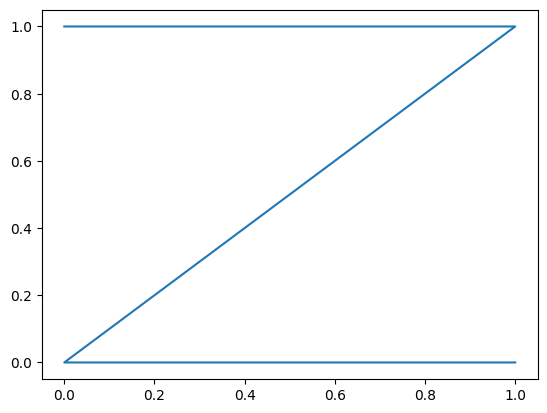

In [91]:
# Creamos las coordenadas de una letra Z:
x = [0, 1, 0, 1]
y = [1, 1, 0, 0]

# La graficamos con la función `plot`:
plt.plot(x, y)

# Mostramos la gráfica (opcional en Jupyter, obligatorio en scripts):
plt.show()

Sin embargo, dado que Python es un lenguaje de programación general y orientado
a objetos, Matplotlib también es una biblioteca orientada a objetos; lo que
nos permite programar gráficos de manera más flexible y poderosa (de forma
decente, por lo menos).

En esta interfaz orientada a objetos tenemos algunas clases principales:

- `Artist` (**Artista**): Cualquier cosa que se pueda dibujar en un gráfico.
  Esto incluye objetos como líneas (`Line2D`), texto (`Text`), polígonos
  (`Polygon`), imágenes (`Image`), y más.
- `Axes` (**Ejes**): El área donde dibujan los artistas, esta está delimitada
  por los ejes.
- `Figure` (**Figura**): La ventana que contiene uno o varios ejes.

In [92]:
# Para comenzar una figura nueva, se comienza con `plt.subplots`:
plt.subplots?

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

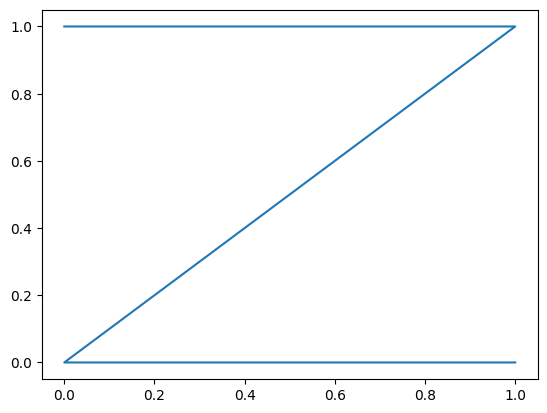

In [93]:
# Uso de la interfaz orientada a objetos de `matplotlib`:
fig, ax = plt.subplots()
artists1 = ax.plot(x, y)

In [94]:
# Observamos que `artists1` es una lista con un solo elemento (la línea):
artists1

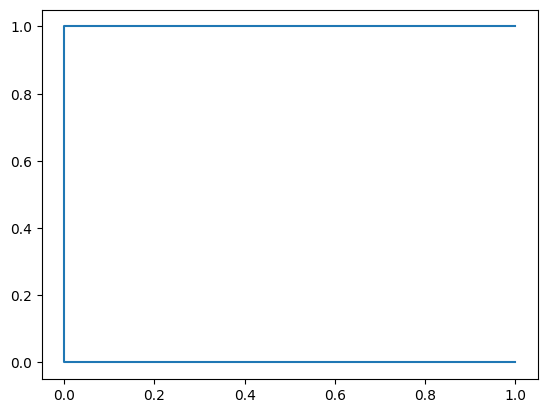

In [95]:
linea_azul = artists1[0]
linea_azul.set_xdata([1, 0, 0, 1])  # Cambiamos a una letra C
fig  # Mostremos la figura nuevamente

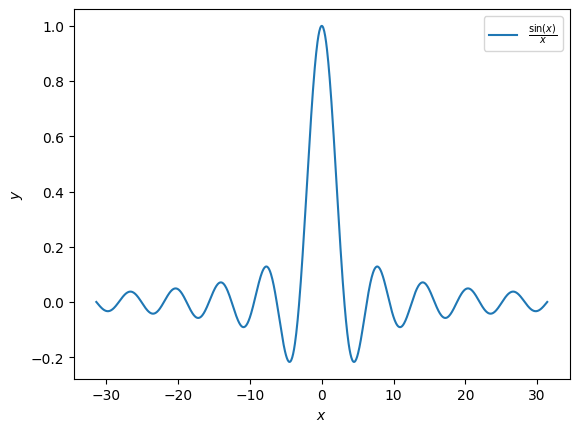

In [96]:
# Repaso de la tabulación de funciones elementales:
x = np.linspace(-10*np.pi, 10*np.pi, 1000)
y = np.sin(x)/x

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\frac{\sin(x)}{x}$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.legend()

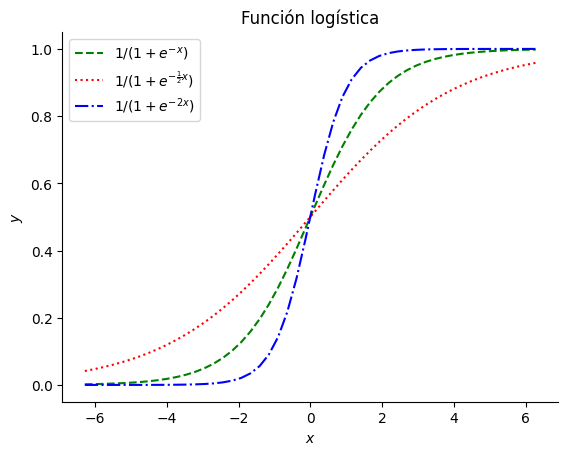

In [104]:
# Ajuste de colores y estilos
x = np.linspace(-2 * np.pi, 2 * np.pi)
y1 = 1 / (1 + np.exp(-x))
y2 = 1 / (1 + np.exp(-0.5 * x))
y3 = 1 / (1 + np.exp(-2 * x))

fig, ax = plt.subplots()
ax.plot(
    x,
    y,
    label=r"$1/(1 + e^{-x})$",
    color="green",
    linestyle="--",  # Línea de guiones
)
ax.plot(
    x,
    y2,
    label=r"$1/(1 + e^{-\frac{1}{2}x})$",
    color="red",
    linestyle=":",  # Línea de puntos
)
ax.plot(
    x,
    y3,
    label=r"$1/(1 + e^{-2x})$",
    color="blue",
    linestyle="-.", # Línea de puntos y guiones
)

ax.legend()  # Mostrar la leyenda de las líneas
ax.set_xlabel(r"$x$")  # Etiqueta del eje x
ax.set_ylabel(r"$y$")  # Etiqueta del eje y
ax.set_title("Función logística")  # Título de la gráfica

# Quitar los ejes superior y derecho
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

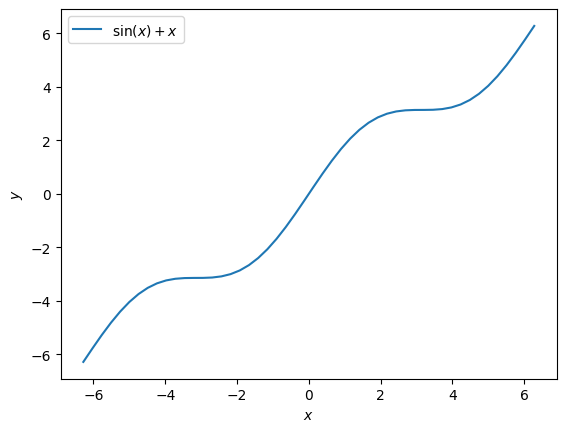

In [114]:
fig, ax = plt.subplots()
x = np.linspace(-2 * np.pi, 2 * np.pi)
y = np.sin(x) + x

ax.plot(x, y, label=r"$\sin(x) + x$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.legend()

ax.set_aspect("auto")  # Relación de aspecto automática (predeterminada)

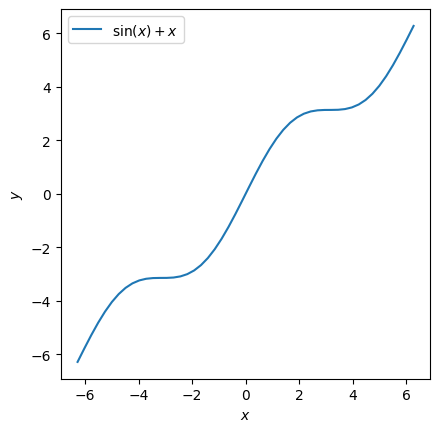

In [115]:
ax.set_aspect("equal")  # Relación de aspecto igual
fig

### 3.2 Gráficos de dispersión

In [ ]:
# Uso de marcadores en las curvas:

In [ ]:
# Uso de ax.scatter para gráficos de dispersión:

In [ ]:
# Ejemplo con el dataset Iris:

### 3.3 Histogramas


In [ ]:
# Generando una distribución normal de datos:

### 3.4 Graficiación de una función bidimensional